# Make Animation from pickels files

In [63]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import platform
from joblib import Parallel, delayed

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = True
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.eps'

In [64]:
import multiprocessing
from joblib import Parallel, delayed
num_jobs=30

In [65]:
## Task specific imports
import os as os
#import keras.utils as image
import glob
from PIL import Image, ImageDraw
import pickle

In [66]:
import math
 

## Choosing Platform
Working is beinging conducted on several computers, and author needs to be able to run code on all without rewriting..  This segment of determines which computer is being used, and sets the directories accordingly.

In [67]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"
    
if Computer ==  "SciClone":
    rootfolder = '/sciclone/scr10/dchendrickson01/EFIT/'
    
else:
    asdfasdf

## Load data

In [68]:
Case = 'BounceTestBigger'
#Case = '20m10XRfRq'

CasesAtaTime = 2
FilesAtTime = 5
ProcessPerFile = 5
Position = 0 #0 Energy, 1 X axis, 2 Y Axis, 3 X axis
skips = 2 #1 every data point, or skip what modulous
SkipToLaser = 10

imFolder=rootfolder+Case+'/'
fileNames = glob.glob(imFolder+'Movements*.p')

Views=[]

In [69]:
fileName = imFolder+'Parameters.p'

file=open(fileName,'rb')
Parameters=pickle.load(file)

file.close()


In [70]:
xmax = Parameters["LargestXnode"]
ymax = Parameters["LargestYnode"]
zmax = Parameters["LargestZnode"]
gridStartWeb = Parameters["WidthStartWebNode"]
gridEndWeb = Parameters["WidthEndWebNode"]
gridEndFoot = Parameters["HeightEndFootNode"]
gridStartHead = Parameters["HeightStartHeadNode"]
gridStartHeadWidth = Parameters["WidthStartHeadNode"]
gridEndHeadWidth = Parameters["WidthEndHeadNode"]
DataBucketSize = Parameters["SaveEveryXStep"]

In [71]:
Parameters

{'AirCut': False,
 'RailShape': True,
 'Flaw': False,
 'Length': 20,
 'Width': 0.1524,
 'Height': 0.1524,
 'SaveFolder': '/sciclone/scr10/dchendrickson01/EFIT/BounceTestBigger/',
 'RunTitle': '5m Rail At 15x long bounce test',
 'TiesIncluded': 0,
 'GridDesignFrequency': 74574,
 'InputSignalFrequency': 16300,
 'SimulationCycleLength': 60,
 'ForcingFuctionNumber': 5,
 'PerWheelForce': 173000,
 'PoisonsRatio': 0.29,
 'YoungsModulous': 200000000000,
 'MaterialDensity': 7800,
 'LongitudinalWaveSpeed': 5796.653896162343,
 'TransverseWaveSpeeed': 3152.519949406393,
 'TimeStep': 3.3333027951074397e-07,
 'RunTime': 0.006130943831041114,
 'TimeStepsSimLength': 18393,
 'GridLengthNodes': 5684,
 'GridWidthNodes': 45,
 'GridHeightNodes': 45,
 'LargestXnode': 5678,
 'LargestYnode': 44,
 'LargestZnode': 44,
 'SaveEveryXStep': 100,
 'HeightStartHeadNode': 29,
 'WidthStartWebNode': 17,
 'WidthEndWebNode': 27,
 'HeightEndFootNode': 9,
 'WidthStartHeadNode': 8,
 'WidthEndHeadNode': 36,
 'AbsorberLengthNo

## Specific Functions

In [72]:
def getPreStrippedData(fileName):
    file=open(fileName,'rb')
    temp = pickle.load(file)
    file.close()
    
    return temp

## make all the frames of all the cases

In [73]:
fileNames = glob.glob(imFolder+'Data*.p')

In [74]:
for i in range(len(fileNames)):
    print(i,fileNames[i].split('-')[1].split('.')[0])

0 EndM4
1 EndM4y
2 EndM2
3 EndM2y
4 EndM2x
5 WebStart
6 WebEnd
7 TopSurface
8 HeadEnd
9 LeftHead
10 MiddleVerticalPlanex
11 MiddleVerticalPlaney
12 MiddleVerticalPlanez


In [75]:
fileIndex = 1

In [76]:
Data = getPreStrippedData(fileNames[fileIndex])

In [77]:
Data.shape

(45, 45, 988)

In [78]:
xs = 0
xe = Data.shape[0]
ts = 0
te = Data.shape[2]
tt = 1

EMin = np.min(Data[xs:xe,:,ts:te])
EMax = np.max(Data[xs:xe,:,ts:te])
v = np.linspace(EMin, EMax, 30, endpoint=True)[0:20]

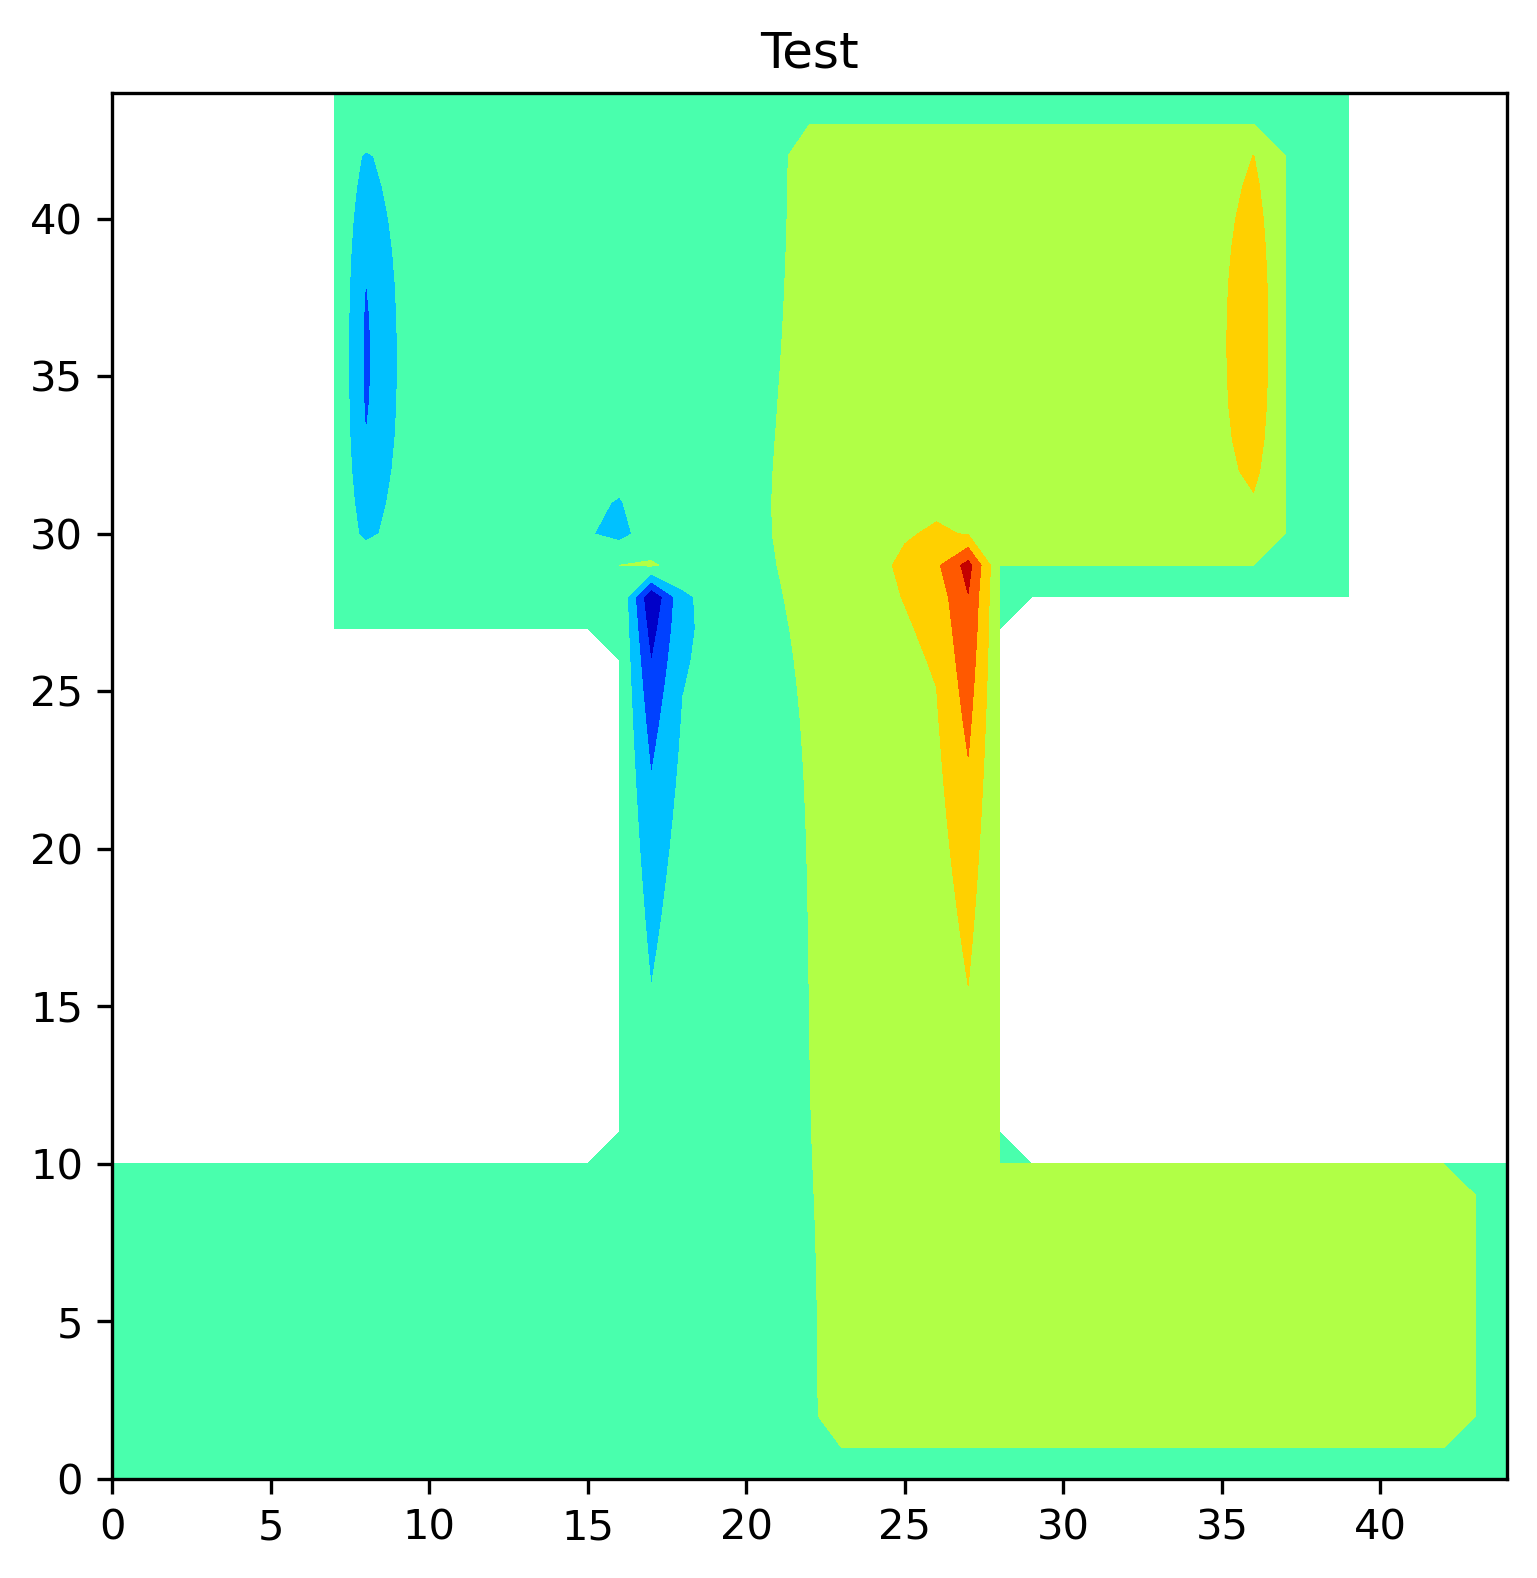

In [79]:
fig = plt.figure(figsize=(6,6), dpi=300)

plt.contourf(Data[:,:,145].T, cmap=plt.cm.jet)
plt.title('Test')
plt.show()

In [80]:
row = 14

In [81]:
for i in range(Data.shape[0]):
    print(i,Data[i,row,149])

0 nan
1 nan
2 nan
3 nan
4 nan
5 nan
6 nan
7 nan
8 nan
9 nan
10 nan
11 nan
12 nan
13 nan
14 nan
15 nan
16 0.0
17 -6.860819772641071e-133
18 -2.7867710802636672e-133
19 -1.8910676118604e-133
20 -1.2758892724920742e-133
21 -6.488483379243132e-134
22 -6.760992081183177e-137
23 6.474293837824743e-134
24 1.2744546869790504e-133
25 1.889925881102596e-133
26 2.786161616896636e-133
27 6.8641137616117076e-133
28 0.0
29 nan
30 nan
31 nan
32 nan
33 nan
34 nan
35 nan
36 nan
37 nan
38 nan
39 nan
40 nan
41 nan
42 nan
43 nan
44 nan


In [82]:
CS = 12
CE = 17

CS=18
CE=26

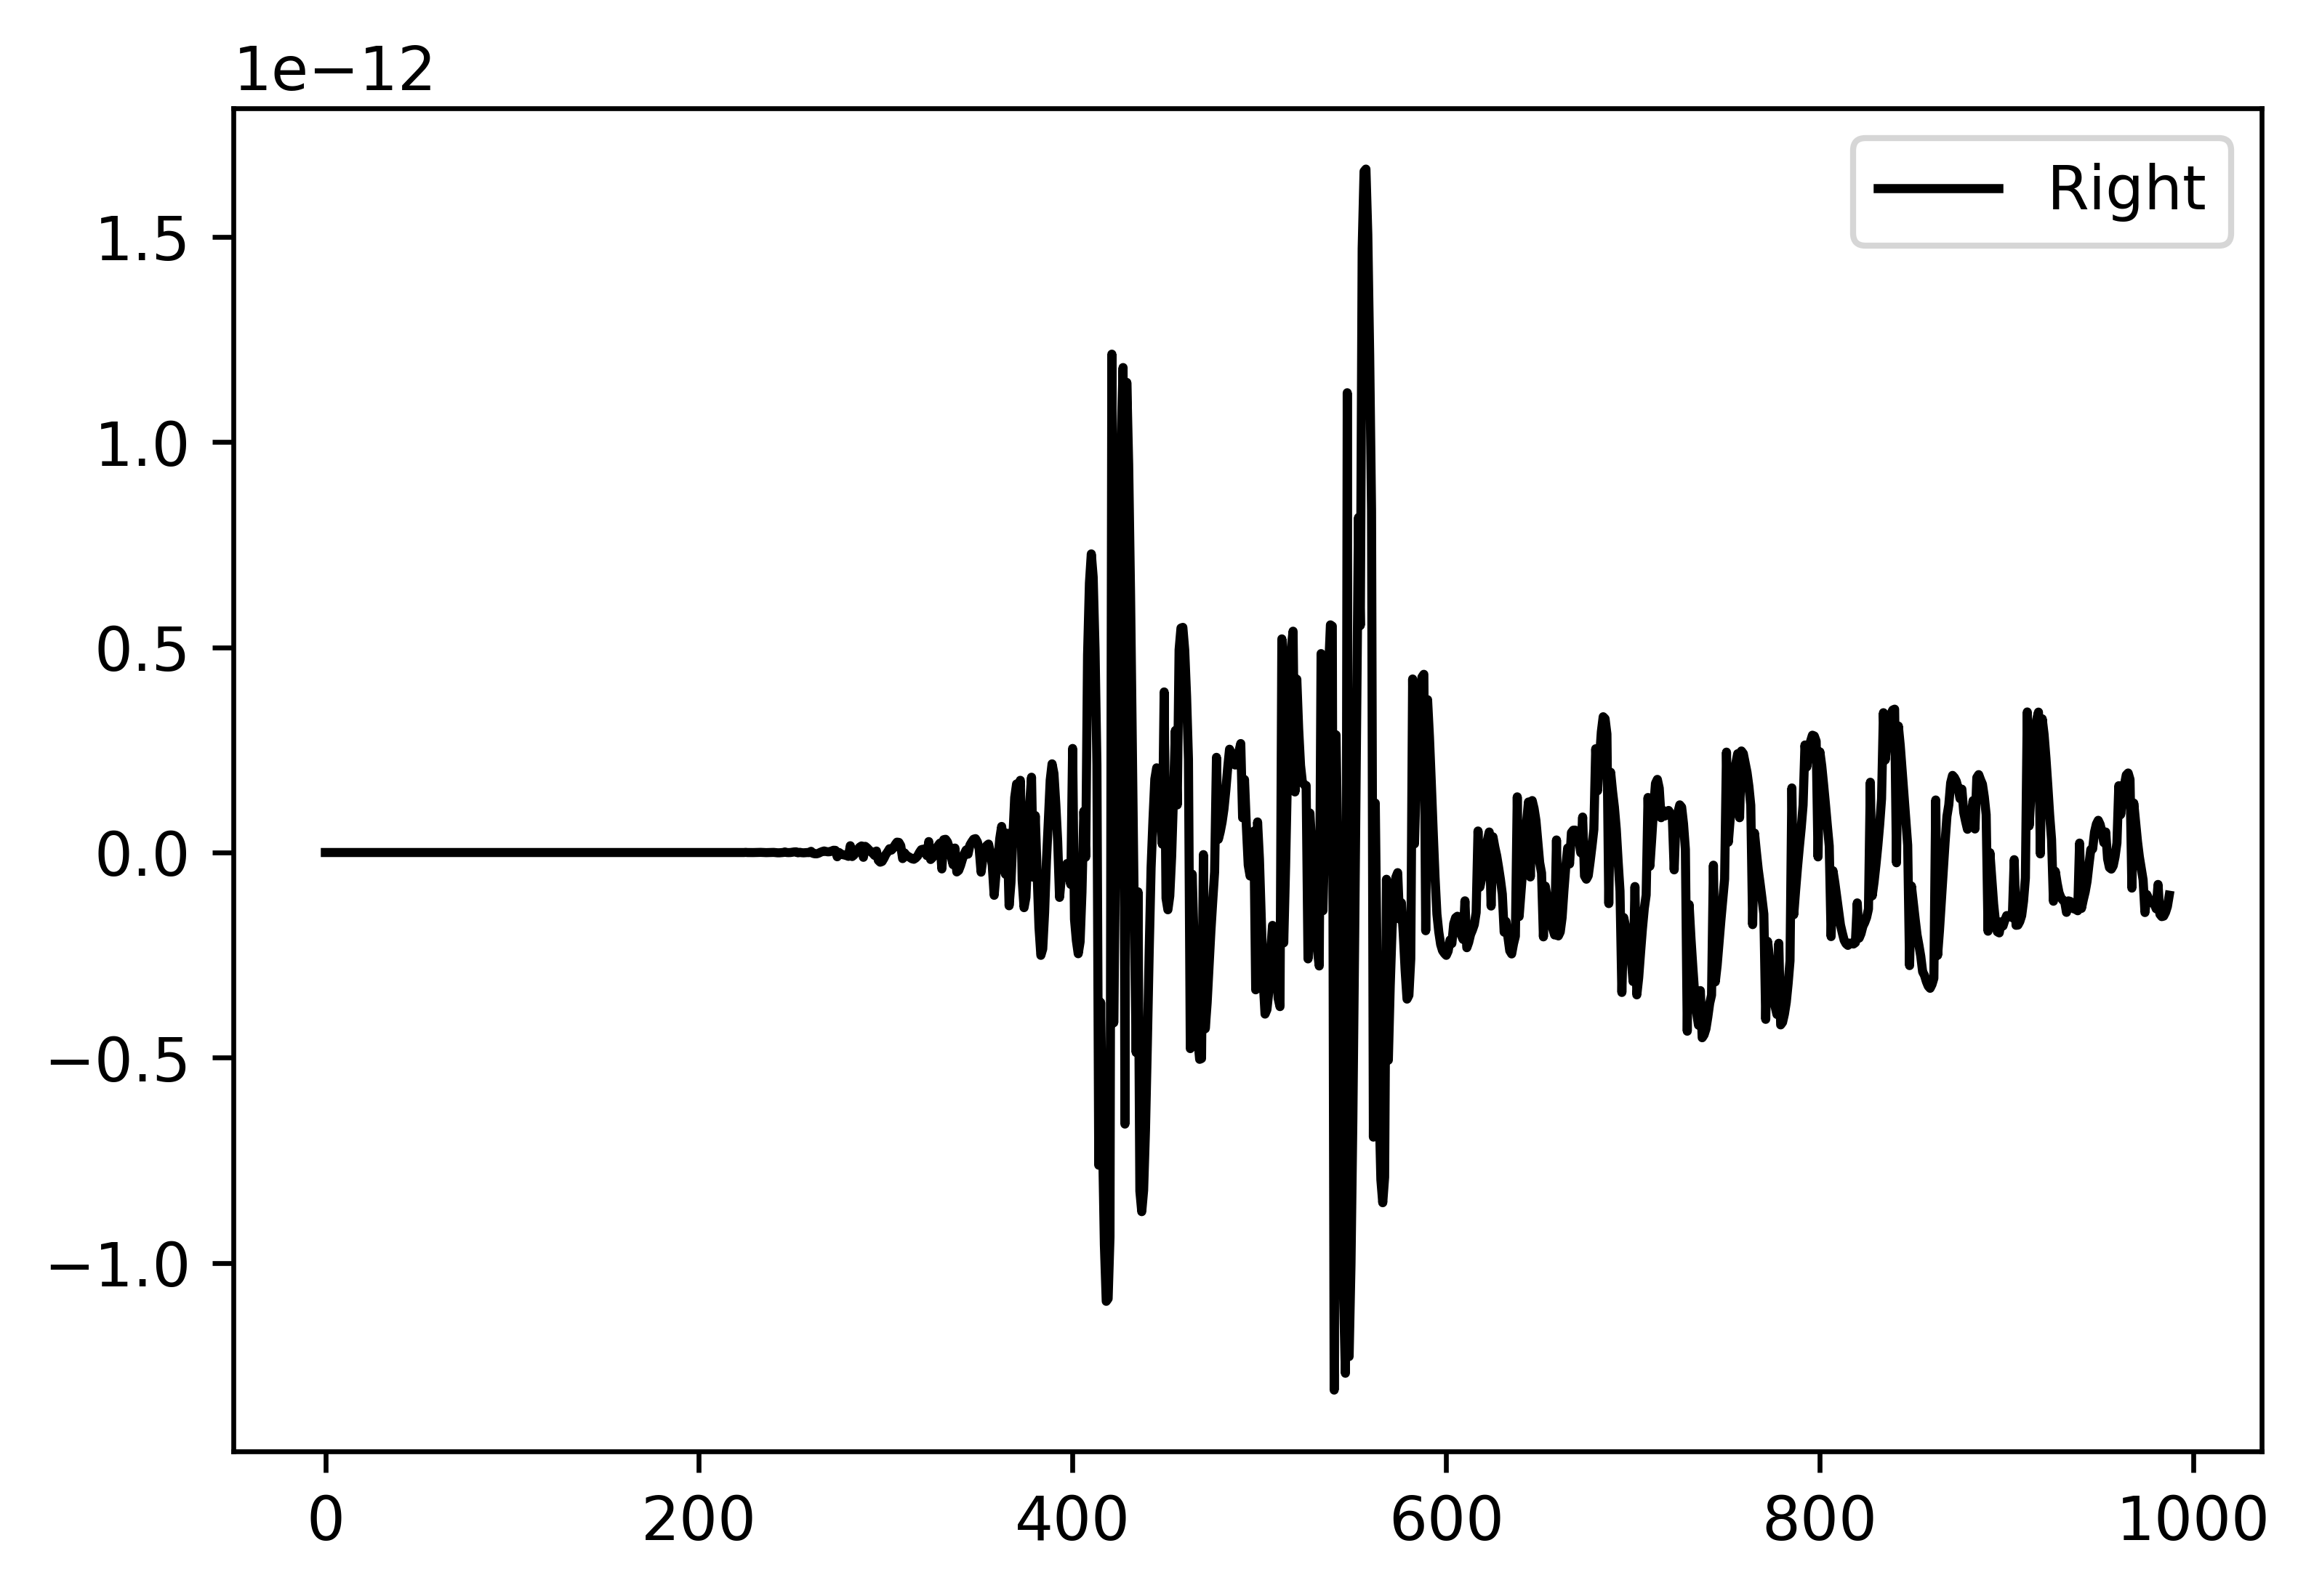

In [83]:
fig = plt.figure(figsize=(6,4),dpi=600)
plt.plot(Data[CS,row,:],label='Right')
#plt.plot(Data[CE,row,:],label='Left')
#plt.plot(Data[CS,row,:]-Data[CE,row], label='Difference')
plt.legend()
plt.show()

## FingerPrinting

In [22]:
import CoreFunctions as cf

In [100]:
Wvlt = 'db3'
NumScales=100
start = 0

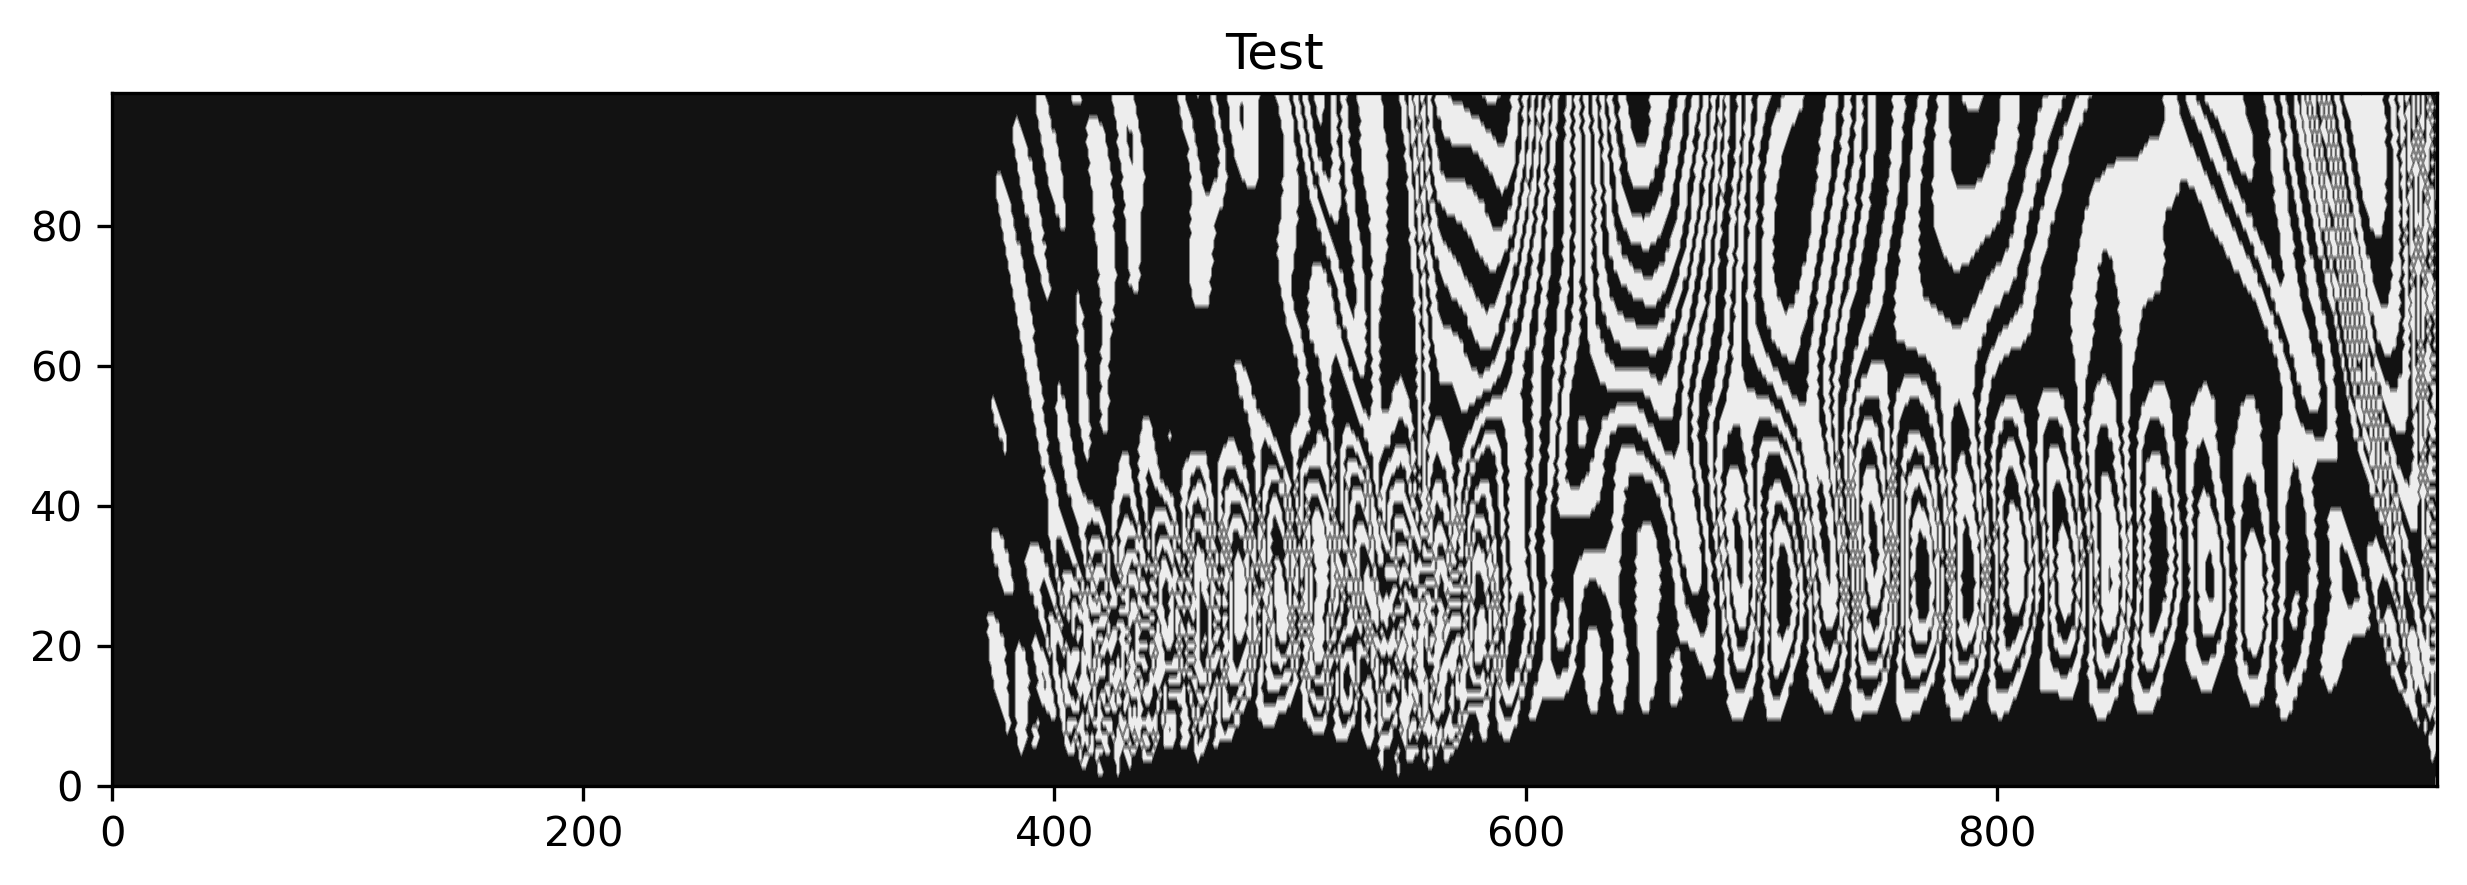

In [106]:
TP1 = cf.getThumbprint2(cf.Smoothing(Data[CS,row,start:],3), wvt=Wvlt, ns=NumScales, scalespace = 1, numslices=12, slicethickness=0.12, 
                  valleysorpeaks='both', normconstant=1, plot=True)
fig = plt.figure(figsize=(10,3), dpi=300)

plt.contourf(TP1.T, cmap='gist_gray')
plt.title('Test')
plt.show()


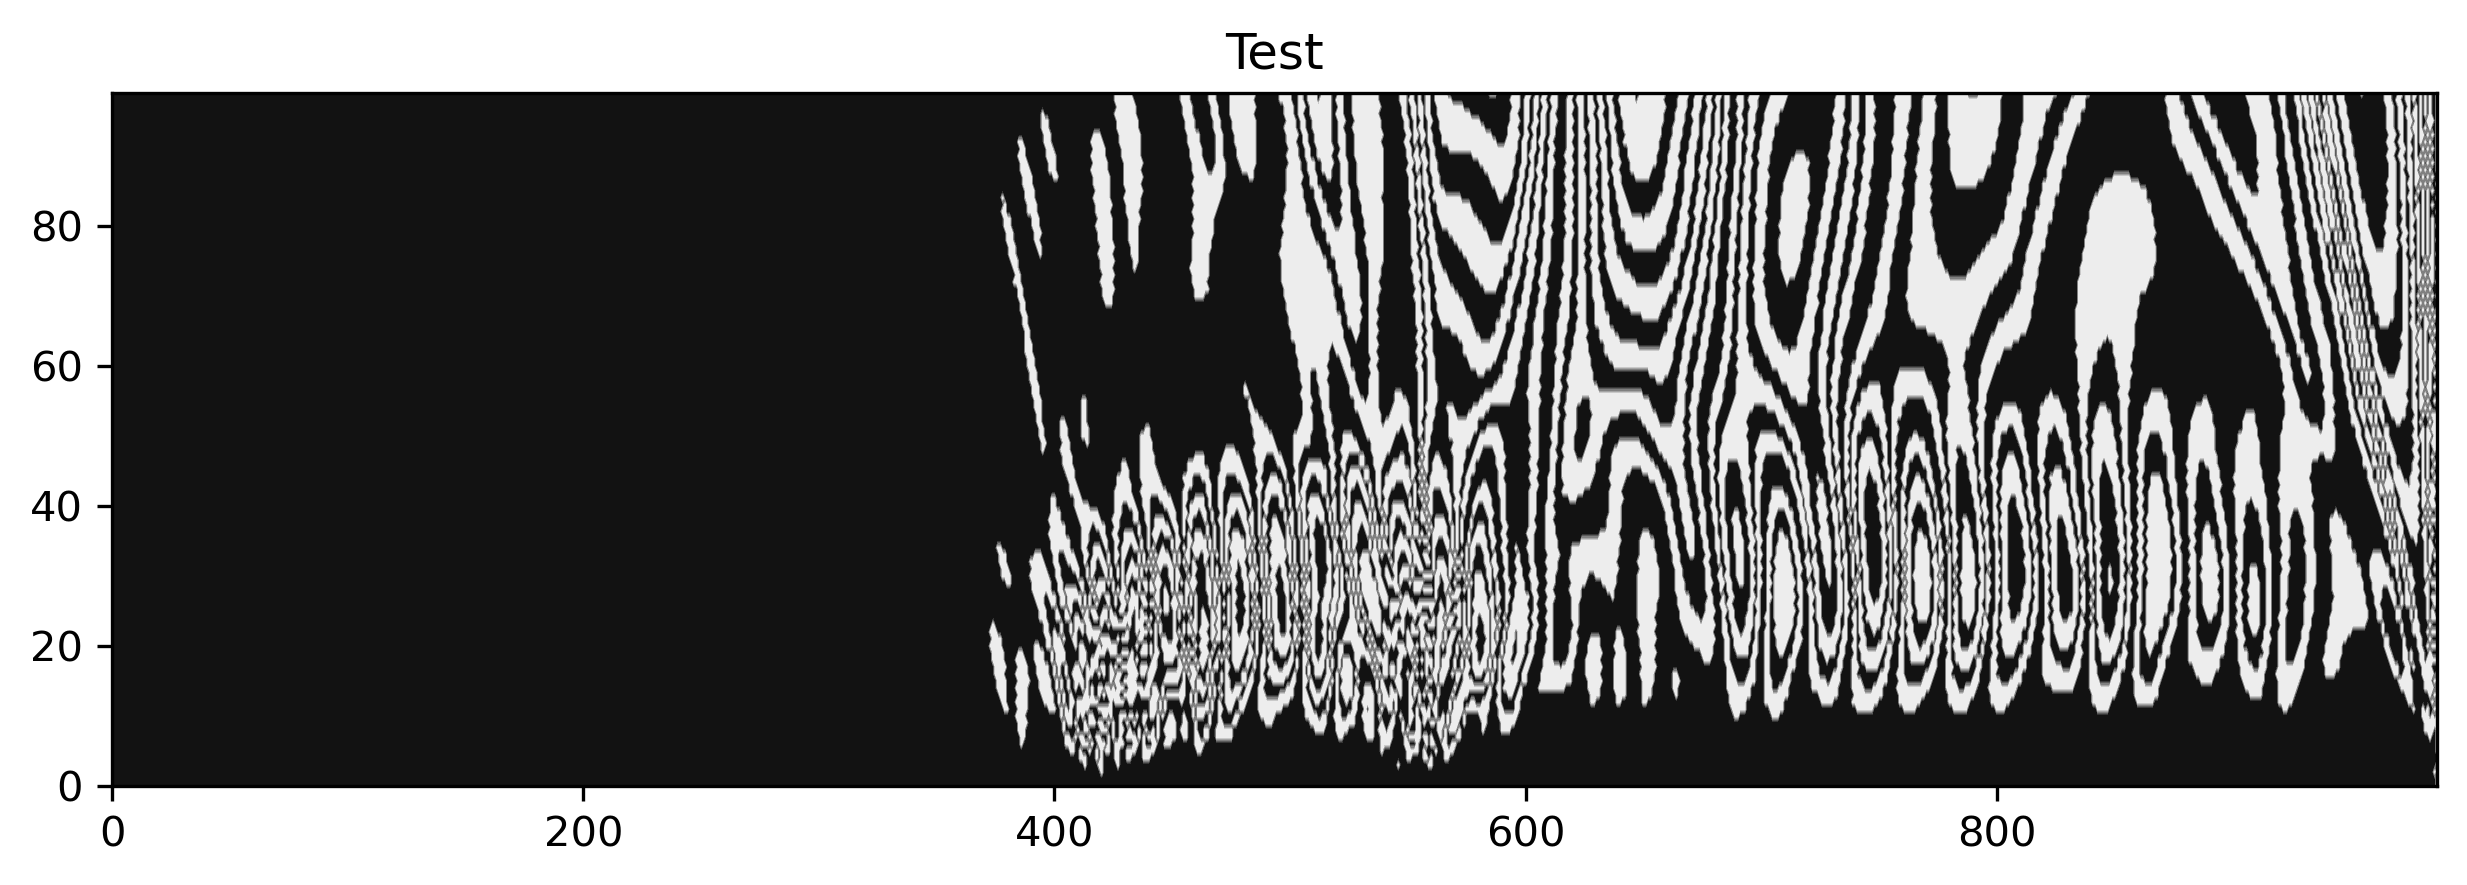

In [90]:
TP2 = cf.getThumbprint2(cf.Smoothing(Data[CE,row,start:],3), wvt=Wvlt, ns=NumScales, 
                        scalespace = 1, numslices=10, slicethickness=0.12, 
                        valleysorpeaks='both', normconstant=1, plot=True)
fig = plt.figure(figsize=(10,3), dpi=300)

plt.contourf(TP1.T, cmap='gist_gray')
plt.title('Test')
plt.show()

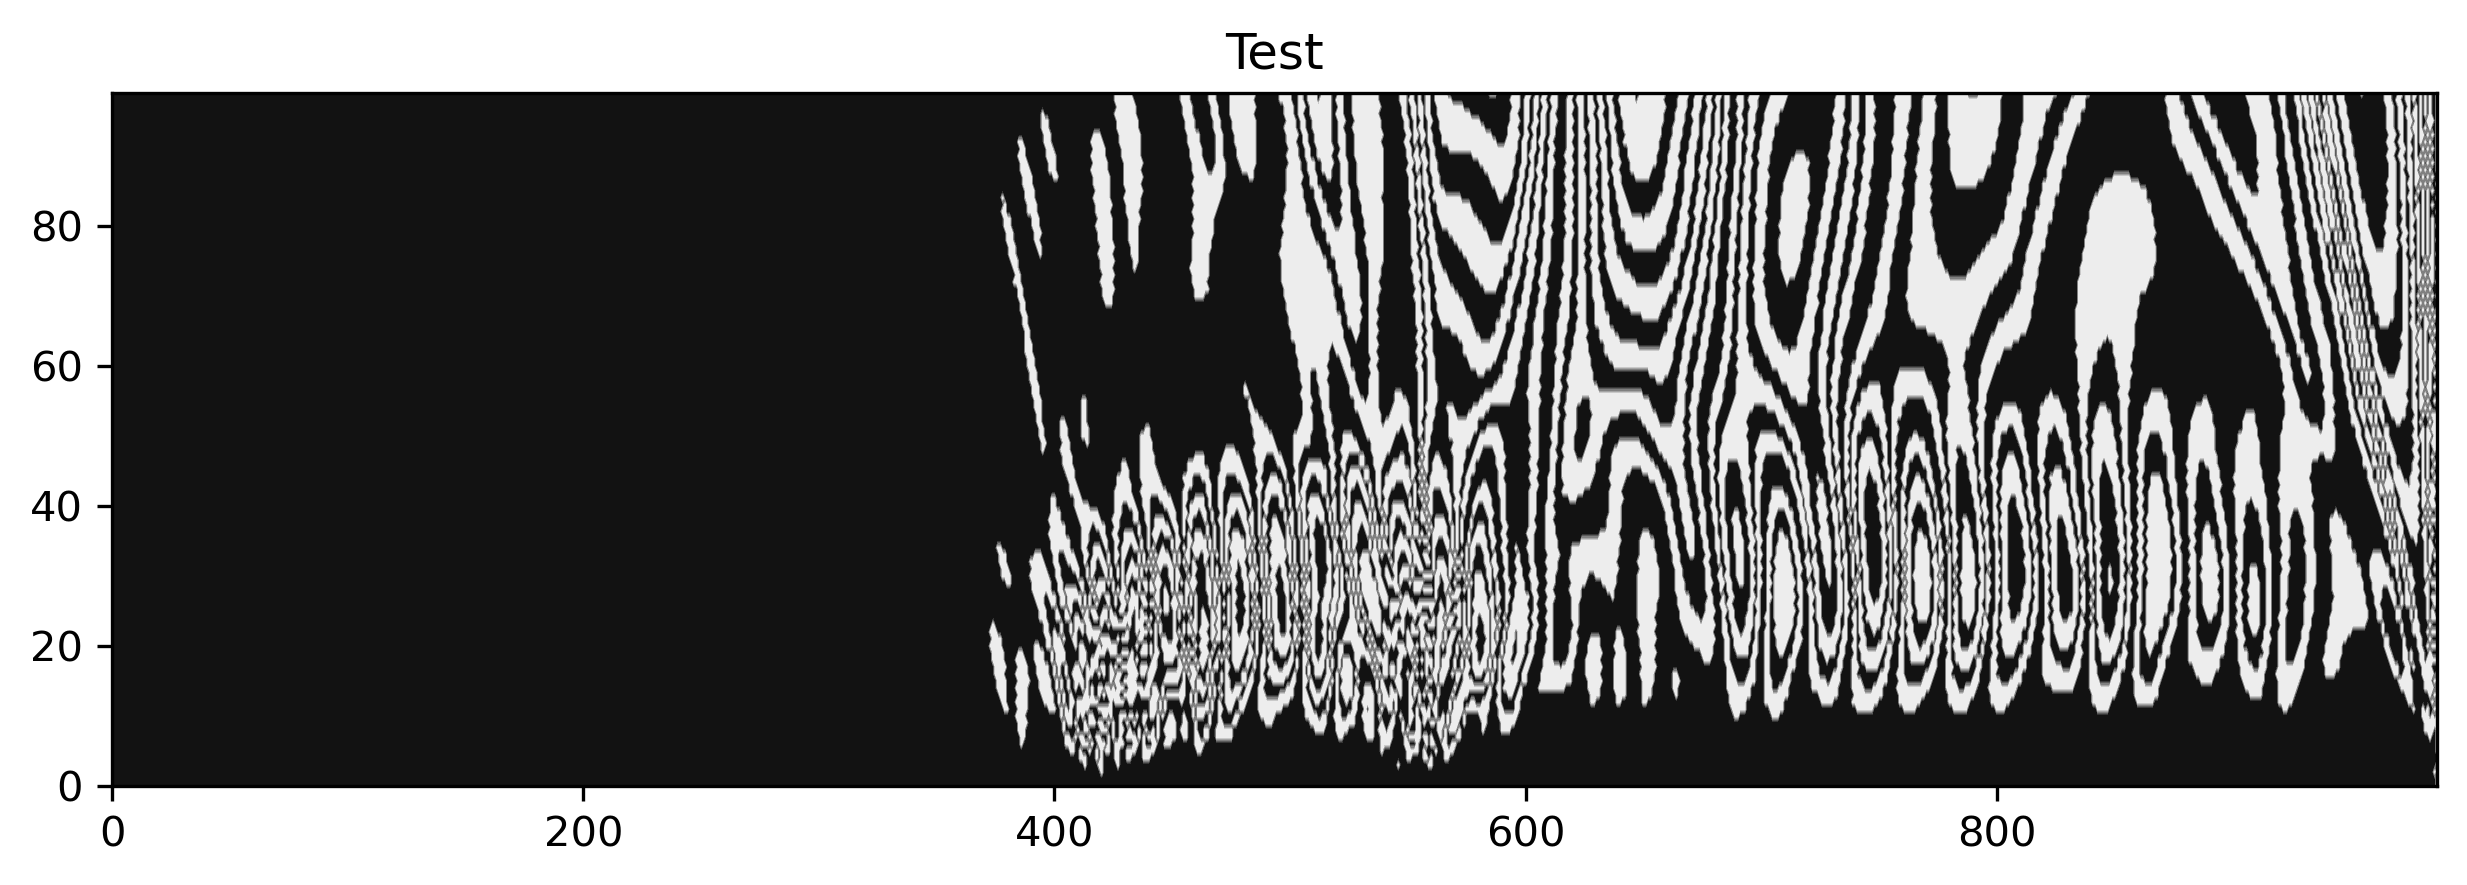

In [91]:
TPD = cf.getThumbprint2(cf.Smoothing(Data[CS,row,start:]-Data[CE,row,start:],3), wvt=Wvlt, ns=NumScales, 
                        scalespace = 1, numslices=10, slicethickness=0.12, 
                        valleysorpeaks='both', normconstant=1, plot=True)
fig = plt.figure(figsize=(10,3), dpi=300)

plt.contourf(TP1.T, cmap='gist_gray')
plt.title('Test')
plt.show()

## Tangent

In [27]:
from joblib import Parallel, delayed
num_jobs=30

In [28]:
def MakeImages(i):
    fig = plt.figure(figsize=(5,5), dpi=200)
    plt.axis('off')
    plt.contourf(Data[xs:xe,:,i].T, cmap=plt.cm.jet)
    plt.savefig(imFolder+'qAni2/Image_'+str(i).zfill(4)+'.png')
    #plt.show()
    plt.close()
    return i

Sets = np.arange(ts,te,tt)
temp = Parallel(n_jobs=num_jobs)(delayed(MakeImages)(i) for i in Sets)
    

FileNotFoundError: [Errno 2] No such file or directory: '/sciclone/scr10/dchendrickson01/EFIT/20m10xTopHitForReal/qAni2/Image_0000.png'

In [ ]:
import glob
from PIL import Image

def make_gif(frame_folder):
    file_list = glob.glob(frame_folder+'*.png') # Get all the pngs in the current directory
    list.sort(file_list, key=lambda x: int(x.split('_')[1].split('.png')[0]))
    frames = [Image.open(image) for image in file_list]
    frame_one = frames[0]
    frame_one.save(imFolder+fileNames[fileIndex].split('-')[1].split('.')[0]+'.gif',
                   format="GIF", append_images=frames[1:], save_all=True, 
                   duration=int(len(frames)/10), loop=0)

make_gif(imFolder+'qAni2/')
